In [1]:
#load libraries
import pandas as pd          
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime     
from pandas import Series         
import seaborn as sns

In [2]:
#load data
url='https://drive.google.com/file/d/1AZrkWsjF47qKjF_2cLCNPiyzy_DnvfvQ/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url,parse_dates = ["DATE"])
df.head(2)

,STATION,NAME,DATE,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
0,USW00094728,"NY CITY CENTRAL PARK, NY US",2000-01-01,5.82,1337.0,1337.0,0.0,0.0,0.0,42.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094728,"NY CITY CENTRAL PARK, NY US",2000-01-02,4.70,2314.0,2313.0,0.0,0.0,0.0,52.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#only use Central Park Station
cp=(df.loc[df['STATION'] == 'USW00094728'])
cp.head(2)

,STATION,NAME,DATE,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
0,USW00094728,"NY CITY CENTRAL PARK, NY US",2000-01-01,5.82,1337.0,1337.0,0.0,0.0,0.0,42.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094728,"NY CITY CENTRAL PARK, NY US",2000-01-02,4.70,2314.0,2313.0,0.0,0.0,0.0,52.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# only look at temperature data
gap=pd.DataFrame(cp[['DATE','TMAX','TMIN']])
gap["GAP"]=gap['TMAX']-gap['TMIN'] #calculate temp gap
gap['DATE'] = gap['DATE'].apply(pd.to_datetime) #make sure Date is a date time object 
gap['date'] = gap['DATE'] 
gap['MONTH'] = pd.DatetimeIndex(gap['DATE']).month #create a month column
gap.set_index('date',inplace=True) #set index 
gap.head()

,DATE,TMAX,TMIN,GAP,MONTH
date,,,,,
2000-01-01,2000-01-01,50.0,34.0,16.0,1
2000-01-02,2000-01-02,60.0,43.0,17.0,1
2000-01-03,2000-01-03,64.0,51.0,13.0,1
2000-01-04,2000-01-04,60.0,46.0,14.0,1
2000-01-05,2000-01-05,47.0,29.0,18.0,1


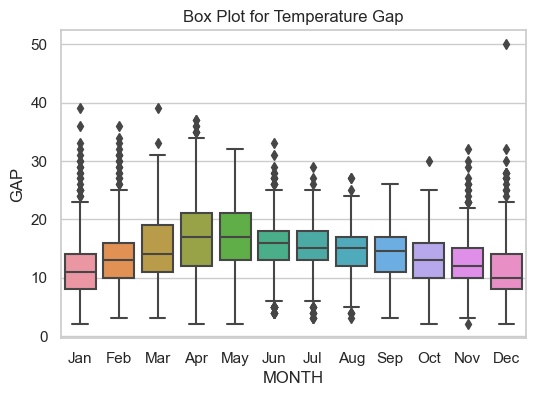

In [7]:
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.boxplot(x='MONTH',y='GAP',data=gap, orient="v")
plt.title("Box Plot for Temperature Gap")
plt.xticks(range(12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.savefig('nycTempGap.png', dpi=300)
plt.show()